# Sentiment Analysis of Customer Feedback

This notebook demonstrates how to perform sentiment analysis on textual customer feedback using a pre-trained transformer model from the `transformers` library. We'll also visualize the sentiment distribution to gain insights.

---

## Step 1: Import Required Libraries

We begin by importing necessary Python libraries for:

- Data manipulation (`pandas`)
- Natural Language Processing (`transformers`)
- Data visualization (`matplotlib`, `seaborn`)
- Environment variable configuration (`os`)


In [2]:
# Import required libraries
import pandas as pd
from transformers import pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import os

# (Optional) Reset PyTorch CUDA memory configuration to avoid potential runtime issues
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = ""


## Step 2: Load Dataset & Initialize Sentiment Analyzer

We load a dataset containing customer feedback from a CSV file. Then, we use the Hugging Face 🤗 `transformers` library to initialize a pre-trained sentiment analysis pipeline based on the `distilbert-base-uncased-finetuned-sst-2-english` model.

- This model is fine-tuned for sentiment classification into **Positive** and **Negative** categories.


In [3]:
# Load dataset
df = pd.read_csv('dataset.csv')

# Display the first few rows of the dataset
df.head()


,feedback
0,This app is amazing and easy to use!
1,The interface is terrible and slow.
2,"It's okay, nothing special."
3,Love the new features!
4,"Crashes frequently, very frustrating."


In [4]:
# Initialize the sentiment analysis pipeline
classifier = pipeline('sentiment-analysis', model='distilbert-base-uncased-finetuned-sst-2-english')


Device set to use cuda:0


## Step 3: Analyze Sentiment for Each Feedback

We apply the sentiment classifier to each customer feedback using `apply()`.  
For each feedback entry, we extract:
- The **sentiment label** (Positive/Negative)
- The **confidence score** (model’s certainty)

These results are stored in new columns: `sentiment` and `score`.


In [5]:
# Perform sentiment analysis and store results
df['sentiment'] = df['feedback'].apply(lambda x: classifier(x)[0]['label'])
df['score'] = df['feedback'].apply(lambda x: classifier(x)[0]['score'])

# Show updated DataFrame
df.head()


,feedback,sentiment,score
0,This app is amazing and easy to use!,POSITIVE,0.999852
1,The interface is terrible and slow.,NEGATIVE,0.999770
2,"It's okay, nothing special.",NEGATIVE,0.818960
3,Love the new features!,POSITIVE,0.999883
4,"Crashes frequently, very frustrating.",NEGATIVE,0.999304


In [6]:
# Map raw sentiment labels to readable format
df['sentiment'] = df['sentiment'].map({'POSITIVE': 'Positive', 'NEGATIVE': 'Negative'})


## Step 4: Visualize the Sentiment Distribution

To better understand the overall sentiment in the feedback, we plot a bar chart using Seaborn.  
This gives us a quick overview of how many feedback entries are Positive vs. Negative.


/tmp/ipykernel_2561970/2439839276.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='viridis')


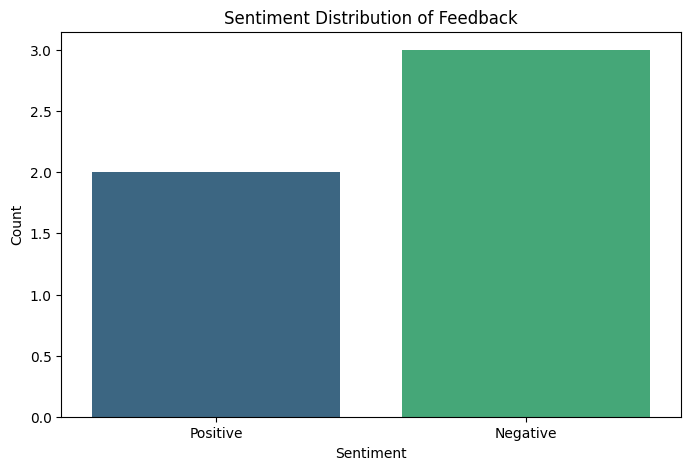

In [7]:
# Set figure size
plt.figure(figsize=(8, 5))

# Create count plot for sentiment
sns.countplot(x='sentiment', data=df, palette='viridis')

# Add plot titles and labels
plt.title('Sentiment Distribution of Feedback')
plt.xlabel('Sentiment')
plt.ylabel('Count')

# Show the plot
plt.show()
